# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn import metrics 
import time

# Dataset

In [2]:
df = pd.read_csv("voice.csv")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Encoding

In [4]:
df['label'] = [1 if i=='male' else 0 for i in df.label]
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

# Scaling

In [5]:
x = df.drop(['label'],axis=1)
y = df.label.values

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# Splitting Training and Testing Dataset

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Training

In [8]:
knn = KNeighborsClassifier(n_neighbors=10)
start = time.perf_counter()
knn.fit(x_train, y_train)
end = time.perf_counter()
predications = knn.predict(x_test)
print("K Nearest Neighbours Accuracy Score : ",knn.score(x_test,y_test))
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("Time Taken : "+str(end-start))

K Nearest Neighbours Accuracy Score :  0.9794952681388013
Out of total 634 samples 621 samples were predicted correctly
Time Taken : 0.16017970000000048


# Classification Report

In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predications)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.98      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [10]:
accscore = accuracy_score (y_test, predications)
recscore = recall_score (y_test, predications)
f1score = f1_score (y_test, predications)
prescor = precision_score(y_test, predications)

In [11]:
print("Accuracy score :"+str(accscore))
print("Precision score :"+str(prescor))
print("Recall score :"+str(recscore))
print("F1 score :"+str(f1score))

Accuracy score :0.9794952681388013
Precision score :0.9792899408284024
Recall score :0.9821958456973294
F1 score :0.9807407407407408


# Confusion Matrix

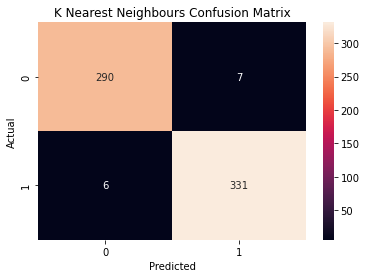

In [12]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("K Nearest Neighbours Confusion Matrix")
plt.show()

# Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

In [13]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [14]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [15]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.1s finished


In [16]:
g_res.best_score_

0.9739518775063799

In [17]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [13]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')

In [14]:
start = time.perf_counter()
knn.fit(x_train, y_train)
end = time.perf_counter()
predications = knn.predict(x_test)
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("K Nearest Neighbours Accuracy Score : ",knn.score(x_test,y_test))
print("Time Taken                          : "+str(end-start))

Out of total 634 samples 622 samples were predicted correctly
K Nearest Neighbours Accuracy Score :  0.9810725552050473
Time Taken                          : 0.001954899999986992


# Classification Report

In [15]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predications)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.98      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [16]:
accscore = accuracy_score (y_test, predications)
recscore = recall_score (y_test, predications)
f1score = f1_score (y_test, predications)
prescor = precision_score(y_test, predications)

In [17]:
print("Accuracy score :"+str(accscore))
print("Precision score :"+str(prescor))
print("Recall score :"+str(recscore))
print("F1 score :"+str(f1score))

Accuracy score :0.9810725552050473
Precision score :0.9821958456973294
Recall score :0.9821958456973294
F1 score :0.9821958456973294


# Confusion Matrix

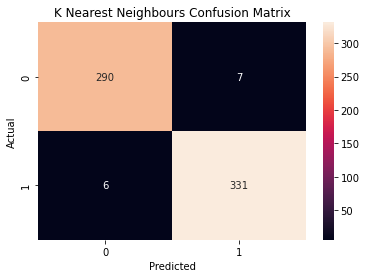

In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("K Nearest Neighbours Confusion Matrix")
plt.show()

# ROC Curve

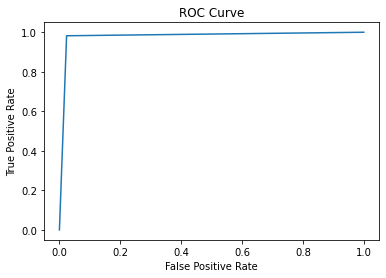

Area Under ROC Curve: 0.9793134110641529


In [22]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, predications, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)